In [1]:
import numpy as np
import datetime
import matplotlib.pyplot as plt
from scipy.stats import skew
from scipy.stats import kurtosis
import scipy.stats as stat
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cross_validation import train_test_split
from sklearn import metrics

C:\Users\harsmoha\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
iris = load_iris()

In [3]:
irisdata = pd.DataFrame(iris.data)
irisdata.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [4]:
featureNames = iris.feature_names

In [5]:
irisdata.columns = featureNames
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
iristarget = pd.DataFrame(iris.target)
iristarget.head()

,0
0,0
1,0
2,0
3,0
4,0


In [7]:
print (pd.unique(iristarget[0]))

[0 1 2]


In [8]:
irisdata.corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.109369,0.871754,0.817954
sepal width (cm),-0.109369,1.000000,-0.420516,-0.356544
petal length (cm),0.871754,-0.420516,1.000000,0.962757
petal width (cm),0.817954,-0.356544,0.962757,1.000000


In [9]:
irisdata.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


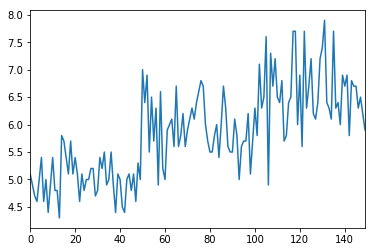

In [10]:
irisdata['sepal length (cm)'].plot()

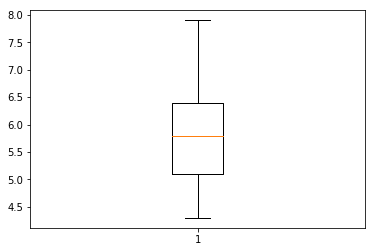

In [11]:
plt.boxplot(irisdata['sepal length (cm)'])
plt.show()

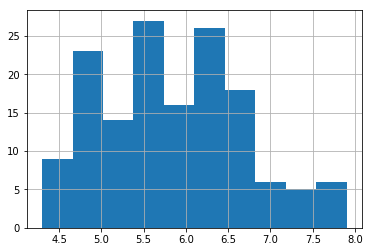

In [12]:
irisdata['sepal length (cm)'].hist()

In [13]:
q = irisdata['sepal length (cm)'].quantile(0.99)
len(irisdata[irisdata['sepal length (cm)']<=q])
#This shows most of the data is in 3rd quartile, hence no need of outlier treatment in this column

149

In [14]:
q = irisdata['sepal width (cm)'].quantile(0.99)
len(irisdata[irisdata['sepal width (cm)']>q])

2

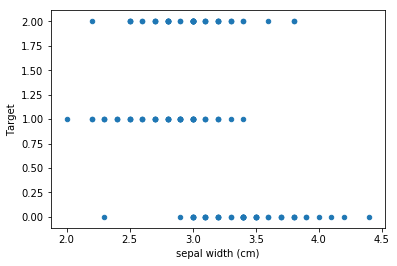

In [15]:
irisdata['Target'] = iristarget[0]
irisdata.plot(kind='scatter',x='sepal width (cm)',y='Target')

In [16]:
irisdata.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [17]:
iristrain, iristest = train_test_split(irisdata,test_size=0.3,random_state=43)

In [18]:
iristrain.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
55,5.7,2.8,4.5,1.3,1
90,5.5,2.6,4.4,1.2,1
79,5.7,2.6,3.5,1.0,1
65,6.7,3.1,4.4,1.4,1
56,6.3,3.3,4.7,1.6,1


In [19]:
iristest.shape

(45, 5)

In [20]:
irisXtrain = iristrain[((iristrain['Target']==1) | (iristrain['Target']==2))].iloc[:,0:4]
irisXtrain.shape

(70, 4)

In [21]:
irisYtrain = iristrain[((iristrain['Target']==1) | (iristrain['Target']==2))].Target
irisYtrain.shape

(70,)

In [22]:
irisXtest = iristest[((iristest['Target']==1) | (iristest['Target']==2))].iloc[:,0:4]
irisXtest.shape

(30, 4)

In [23]:
irisYtest = iristest[((iristest['Target']==1) | (iristest['Target']==2))].Target
irisYtest.shape

(30,)

In [25]:
from sklearn import linear_model

In [30]:
reg = linear_model.LogisticRegression()

In [31]:
irismodel = reg.fit(irisXtrain, irisYtrain)

In [32]:
predicted = irismodel.predict(irisXtest)
predicted

array([2, 1, 2, 2, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1,
       2, 1, 1, 1, 2, 1, 1])

In [33]:
accuracy = reg.score(irisXtrain, irisYtrain)
accuracy

0.95714285714285718

In [34]:
probs = irismodel.predict_proba(irisXtest)
probs

array([[ 0.39475316,  0.60524684],
       [ 0.89780788,  0.10219212],
       [ 0.07232574,  0.92767426],
       [ 0.08485459,  0.91514541],
       [ 0.90610297,  0.09389703],
       [ 0.89920914,  0.10079086],
       [ 0.89610771,  0.10389229],
       [ 0.79935703,  0.20064297],
       [ 0.0661976 ,  0.9338024 ],
       [ 0.67944496,  0.32055504],
       [ 0.87136284,  0.12863716],
       [ 0.04916817,  0.95083183],
       [ 0.02406817,  0.97593183],
       [ 0.17289139,  0.82710861],
       [ 0.4026048 ,  0.5973952 ],
       [ 0.01794682,  0.98205318],
       [ 0.83055083,  0.16944917],
       [ 0.80165186,  0.19834814],
       [ 0.89762245,  0.10237755],
       [ 0.95143161,  0.04856839],
       [ 0.10453309,  0.89546691],
       [ 0.14248244,  0.85751756],
       [ 0.91658648,  0.08341352],
       [ 0.13243254,  0.86756746],
       [ 0.88379196,  0.11620804],
       [ 0.57430608,  0.42569392],
       [ 0.86024354,  0.13975646],
       [ 0.12365876,  0.87634124],
       [ 0.85229082,

In [35]:
#examine coefficients
#irismodel.coef_
#pd.DataFrame(zip(irisXtrain.columns, np.transpose(irismodel.coef_[0])))

In [36]:
a = metrics.classification_report(irisYtest,predicted)
print (a)

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        17
          2       1.00      1.00      1.00        13

avg / total       1.00      1.00      1.00        30



In [37]:
print (metrics.confusion_matrix(irisYtest, predicted))

[[17  0]
 [ 0 13]]


In [38]:
#probs[:,1]
#Important to set a threshold like 0.6 below as some of the probabilities are too less
predictedclass = [2 if (x>0.6) else 1 for x in probs[:,1]]

In [39]:
print (metrics.classification_report(irisYtest,predictedclass))

             precision    recall  f1-score   support

          1       0.94      1.00      0.97        17
          2       1.00      0.92      0.96        13

avg / total       0.97      0.97      0.97        30



In [40]:
print (metrics.confusion_matrix(irisYtest, predictedclass))

[[17  0]
 [ 1 12]]


In [41]:
#fpr-false positive rate
#tpr-true positive rate
fpr, tpr, thresholds = metrics.roc_curve(irisYtest,predicted,pos_label=1)

In [42]:
print (thresholds)

[3 2 1]


In [43]:
len(irisYtest)

30

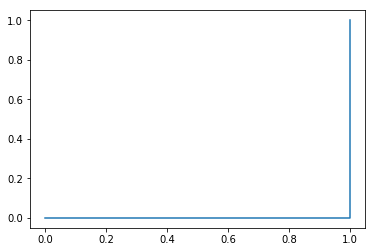

In [44]:
plt.plot(fpr,tpr)
plt.show()

In [2]:
#Using KNN algo
from sklearn.neighbors import KNeighborsClassifier

In [4]:
knn = KNeighborsClassifier()
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [45]:
knn.fit(irisXtrain, irisYtrain)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [46]:
predictedknn = knn.predict(irisXtest)

In [47]:
print (metrics.classification_report(irisYtest, predictedknn))

             precision    recall  f1-score   support

          1       1.00      0.94      0.97        17
          2       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30



In [81]:
#penalty=l1 makes it lasso regularization
irismodel1 = linear_model.LogisticRegression(penalty='l1')
irismodel1
#LogisticRegressionCV can also be used which uses cross validation for better results.
#Eg-clf = LogisticRegressionCV(n_jobs=2, penalty='l1', solver='liblinear', cv=10, scoring = ‘accuracy’, random_state=0)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [46]:
reg1 = irismodel1.fit(irisXtrain,irisYtrain)

In [47]:
reg1.coef_

array([[-2.24095029, -2.03147218,  2.69598042,  4.05860829]])

In [48]:
predicted1 = reg1.predict(irisXtest)

In [49]:
print (metrics.confusion_matrix(irisYtest, predicted1))

[[17  0]
 [ 0 13]]


In [50]:
print (metrics.classification_report(irisYtest, predictedclass))

             precision    recall  f1-score   support

          1       0.94      1.00      0.97        17
          2       1.00      0.92      0.96        13

avg / total       0.97      0.97      0.97        30



In [42]:
#Doing same thing using Naive Bayes

In [43]:
from sklearn.naive_bayes import GaussianNB

In [44]:
NBmodel = GaussianNB()

In [189]:
regNB = NBmodel.fit(irisXtrain,irisYtrain)

In [190]:
predictedNB = regNB.predict(irisXtest)

In [194]:
#regNB.predict_proba(irisXtest)
print (metrics.classification_report(irisYtest, predictedNB))

             precision    recall  f1-score   support

          1       1.00      0.94      0.97        17
          2       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30



In [195]:
print (metrics.confusion_matrix(irisYtest, predictedNB))

[[16  1]
 [ 0 13]]
